# Imports

In [0]:
import random 
random.seed(42)

import nltk
from nltk import pos_tag
from nltk.corpus import stopwords

import numpy as np

from matplotlib import pyplot as plt

from sklearn import metrics, preprocessing
import sklearn.cluster as clst
from sklearn.cluster import KMeans as KM
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import time

# Data Setup

In [0]:
# Setup:
twenty_train = fetch_20newsgroups(subset='all', categories=None, shuffle=True, random_state=42)
print(twenty_train.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [0]:
len(twenty_train.data)

18846

# Question 11

In [0]:
vectorizer = CountVectorizer(min_df=3, stop_words='english')
tfidf_transformer = TfidfTransformer()
X_train_20 = vectorizer.fit_transform(twenty_train.data)
X_train_tfidf_20 = tfidf_transformer.fit_transform(X_train_20)
print(X_train_tfidf_20.shape)

(18846, 52295)


In [0]:
km = KM(n_clusters =20, init='k-means++')
print("Clustering sparse data with k_means")

Clustering sparse data with k_means


In [0]:
km.fit(X_train_tfidf_20)
print("Training Finished!!")

Training Finished!!


**Setting-1**, better setting results shown below.

In [0]:
import pickle

fid_kmeans20 = open('kmeans20_model.sav','wb')
pickle.dump(km,fid_kmeans20)
fid_kmeans20.close()

In [0]:
# Find the other metrics aswell.
Homogeneity     = metrics.homogeneity_score(twenty_train.target, km.labels_)
Completeness    = metrics.completeness_score(twenty_train.target, km.labels_)
V_measure       = metrics.v_measure_score(twenty_train.target, km.labels_)
Adjstd_Rand     = metrics.adjusted_rand_score(twenty_train.target, km.labels_)
Adjstd_mtl_info = metrics.adjusted_mutual_info_score(twenty_train.target, km.labels_)
Average         = (Homogeneity+Completeness+V_measure+Adjstd_Rand+Adjstd_mtl_info)/5
print("Homogeneity: %0.3f" % Homogeneity)
print("Completeness: %0.3f" % Completeness)
print("V-measure: %0.3f" % V_measure)
print("Adjusted Rand-Index: %.3f" % Adjstd_Rand)
print("Adjusted mutual info score: %0.3f" % Adjstd_mtl_info)
print("Average of scores: %0.3f" % Average)

Homogeneity: 0.289
Completeness: 0.357
V-measure: 0.319
Adjusted Rand-Index: 0.102
Adjusted mutual info score: 0.287
Average of scores: 0.271


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


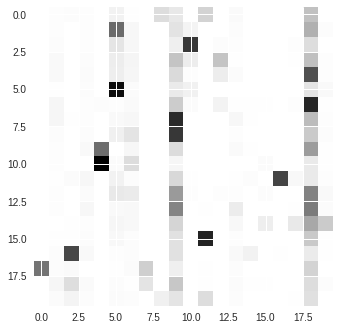

In [0]:
plt.imshow(metrics.cluster.contingency_matrix(twenty_train.target, km.labels_))

In [0]:
np.save('contingency_matrix1', np.array(metrics.cluster.contingency_matrix(twenty_train.target, km.labels_)))

**Setting-2** which gave the best result and this is mentioned in the report.

In [0]:
km1 = KM(n_clusters =20, random_state=0, max_iter = 1000, n_init = 30, n_jobs=-1)
km1.fit(X_train_tfidf_20)
print("Training Finished!!")

# Find the other metrics aswell.
Homogeneity     = metrics.homogeneity_score(twenty_train.target, km1.labels_)
Completeness    = metrics.completeness_score(twenty_train.target, km1.labels_)
V_measure       = metrics.v_measure_score(twenty_train.target, km1.labels_)
Adjstd_Rand     = metrics.adjusted_rand_score(twenty_train.target, km1.labels_)
Adjstd_mtl_info = metrics.adjusted_mutual_info_score(twenty_train.target, km1.labels_)
Average         = (Homogeneity+Completeness+V_measure+Adjstd_Rand+Adjstd_mtl_info)/5
print("Homogeneity: %0.3f" % Homogeneity)
print("Completeness: %0.3f" % Completeness)
print("V-measure: %0.3f" % V_measure)
print("Adjusted Rand-Index: %.3f" % Adjstd_Rand)
print("Adjusted mutual info score: %0.3f" % Adjstd_mtl_info)
print("Average of scores: %0.3f" % Average)

Training Finished!!
Homogeneity: 0.359
Completeness: 0.451
V-measure: 0.400
Adjusted Rand-Index: 0.137
Adjusted mutual info score: 0.357
Average of scores: 0.341


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [0]:
import pickle

fid_kmeans20_new = open('kmeans20_comp_model.sav','wb')
pickle.dump(km1,fid_kmeans20_new)
fid_kmeans20_new.close()

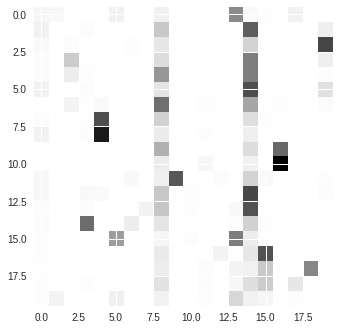

In [0]:
plt.imshow(metrics.cluster.contingency_matrix(twenty_train.target, km1.labels_))

In [0]:
np.save('contingency_matrix2', np.array(metrics.cluster.contingency_matrix(twenty_train.target, km1.labels_)))